## Test subalign code

In [1]:
import numpy as np
import numpy.random as rnd
import scipy.stats as st
import scipy.linalg as alg

In [2]:
import sys
sys.path.append("..")
from subalign import SubspaceAlignedClassifier, SemiSubspaceAlignedClassifier
from sklearn.linear_model import LogisticRegressionCV

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style="whitegrid")

fS = 24
font = {'weight' : 'bold', 'size'   : fS}
matplotlib.rc('font', **font)

In [4]:
'''Generate data'''

# Dimensionality
D = 2

# Subspace dim
d = 2

# Number of classes
K = 2

# Sample sizes
N = 100
N0 = 50
N1 = 50

M = 100
M0 = 50
M1 = 50

if K == 1:
    
    if D == 2:

        muS = np.array([0, 1])
        muT = np.array([1, 0])
        SiS = np.array([[3, 0],[0, .1]])
        SiT = np.array([[3, 0],[0, .1]])

    elif D == 3:

        muS = np.array([-2, 1, 0])
        muT = np.array([1, 2, 0])
        SiS = np.array([[1, 0, 0],[0, 1, 0], [0, 0, 1]])/10
        SiT = np.array([[1, 0, 0],[0, 1, 0], [0, 0, 1]])/10

    pS = st.multivariate_normal(muS, SiS)
    pT = st.multivariate_normal(muT, SiT)

    X = pS.rvs(N)
    Y = np.zeros((N,))

    Z = pT.rvs(M)
    U = np.zeros((M,))

elif K == 2:

    if D == 2:

        muS0 = np.array([-3, -1])
        muS1 = np.array([2, 1])
        muT0 = np.array([1, 2])
        muT1 = np.array([0, -2])
        SiS0 = np.array([[1.2, 0.5],[0.5, 1]])/10
        SiS1 = np.array([[1.2, 0.5],[0.5, 1]])/10
        SiT0 = np.array([[1, 0.8],[0.8, 1]])/10
        SiT1 = np.array([[1, 0.8],[0.8, 1]])/10

    elif D == 3:

        muS0 = np.array([0, 0, 0])
        muS1 = np.array([1, 1, 1])
        muT0 = np.array([1, 0, 1])
        muT1 = np.array([0, 1, 0])
        SiS0 = np.array([[1.2, 0.8, 0.3],[0.8, 1, 0.3], [0.3, 0.3, 1]]) / 10
        SiS1 = np.array([[1.2, 0.8, 0.3],[0.8, 1, 0.3], [0.3, 0.3, 1]]) / 10
        SiT0 = np.array([[1.5, 0.9, 1.1],[0.9, 1.3, 0.3], [1.1, 0.3, 1.2]]) / 10
        SiT1 = np.array([[1.5, 0.9, 1.1],[0.9, 1.3, 0.3], [1.1, 0.3, 1.2]]) / 10

    pS0 = st.multivariate_normal(muS0, SiS0)
    pS1 = st.multivariate_normal(muS1, SiS1)
    pT0 = st.multivariate_normal(muT0, SiT0)
    pT1 = st.multivariate_normal(muT1, SiT1)

    X = np.concatenate((pS0.rvs(N0), pS1.rvs(N1)), axis=0)
    Y = np.concatenate((np.zeros((N0,)), np.ones(N1,)), axis=0)

    Z = np.concatenate((pT0.rvs(M0), pT1.rvs(M1)), axis=0)
    U = np.concatenate((np.zeros((M0,)), np.ones(M1,)), axis=0)
    
# Z-score data
X = st.zscore(X)
Z = st.zscore(Z)

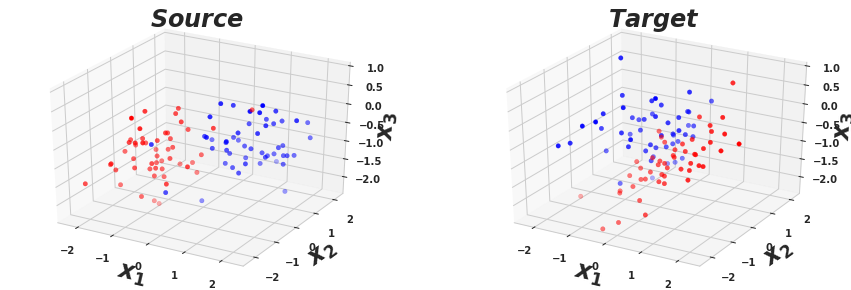

In [5]:
# Visualize data

fig = plt.figure(figsize=(15,5))

if D == 2:
        
    ax0 = fig.add_subplot(121)
    
    ax0.set_xlim([-4,4])
    ax0.set_ylim([-4,4])
    
    ax0.scatter(X[Y == 0, 0], X[Y == 0, 1], c='r')
    ax0.scatter(X[Y == 1, 0], X[Y == 1, 1], c='b')
    ax0.set_xlabel('$x_1$', fontsize=fS)
    ax0.set_ylabel('$x_2$', fontsize=fS)
    ax0.set_title('$Source$', fontsize=fS)

    ax1 = fig.add_subplot(122, sharex=ax0, sharey=ax0)
    ax1.scatter(Z[U == 0, 0], Z[U == 0, 1], c='r')
    ax1.scatter(Z[U == 1, 0], Z[U == 1, 1], c='b')
    ax1.set_xlabel('$x_1$', fontsize=fS)
    ax1.set_ylabel('$x_2$', fontsize=fS)
    ax1.set_title('$Target$', fontsize=fS);

elif D == 3:

    ax0 = fig.add_subplot(121, projection='3d')

    ax0.scatter(X[Y == 0, 0], X[Y == 0, 1], X[Y == 0, 2], c='r')
    ax0.scatter(X[Y == 1, 0], X[Y == 1, 1], X[Y == 0, 2], c='b')
    ax0.set_xlabel('$x_1$', fontsize=fS)
    ax0.set_ylabel('$x_2$', fontsize=fS)
    ax0.set_zlabel('$x_3$', fontsize=fS)
    ax0.set_title('$Source$', fontsize=fS)

    ax1 = fig.add_subplot(122, sharex=ax0, sharey=ax0, sharez=ax0, projection='3d')
    ax1.scatter(Z[U == 0, 0], Z[U == 0, 1], Z[U == 0, 1], c='r')
    ax1.scatter(Z[U == 1, 0], Z[U == 1, 1], Z[U == 0, 1], c='b')
    ax1.set_xlabel('$x_1$', fontsize=fS)
    ax1.set_ylabel('$x_2$', fontsize=fS)
    ax1.set_zlabel('$x_3$', fontsize=fS)
    ax1.set_title('$Target$', fontsize=fS);

## Test unsupervised alignment

In [6]:
'''Find transformation'''

# Call instance of subalign
clf = SubspaceAlignedClassifier()

# Obtain transformation matrix and components
V, CX, CZ = clf.subspace_alignment(X, Z, subspace_dim=d)

# Map source onto principal components (for visualization)
XC = X @ CX

# Align data
XV, ZC = clf.align_data(X, Z, CX, CZ, V)

In [7]:
print('Covariance matrix of source data and aligned source data:\n {}\n \n {}\n'.format(np.cov(X.T), np.cov(XV.T)))

print('Covariance matrix of target data and projected target data:\n {}\n \n {}\n'.format(np.cov(Z.T), np.cov(ZC.T)))

Covariance matrix of source data and aligned source data:
 [[1.01010101 0.9320977  0.77402266]
 [0.9320977  1.01010101 0.79183127]
 [0.77402266 0.79183127 1.01010101]]
 
 [[0.63853108 1.05542969]
 [1.05542969 2.08524004]]

Covariance matrix of target data and projected target data:
 [[ 1.01010101 -0.31767644  0.93699633]
 [-0.31767644  1.01010101 -0.51036189]
 [ 0.93699633 -0.51036189  1.01010101]]
 
 [[2.23009759e+00 1.01801208e-16]
 [1.01801208e-16 7.50896049e-01]]



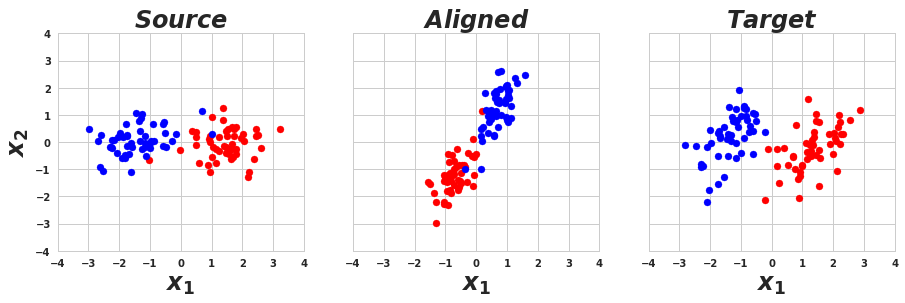

In [8]:
# Visualize data

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15,4))

ax[0].set_xlim([-4,4])
ax[0].set_ylim([-4,4])

ax[0].scatter(XC[Y == 0, 0], XC[Y == 0, 1], c='r')
ax[0].scatter(XC[Y == 1, 0], XC[Y == 1, 1], c='b')
ax[0].set_xlabel('$x_1$', fontsize=fS)
ax[0].set_ylabel('$x_2$', fontsize=fS)
ax[0].set_title('$Source$', fontsize=fS)

ax[1].scatter(XV[Y == 0, 0], XV[Y == 0, 1], c='r')
ax[1].scatter(XV[Y == 1, 0], XV[Y == 1, 1], c='b')
ax[1].set_xlabel('$x_1$', fontsize=fS)
ax[1].set_title('$Aligned$', fontsize=fS);

ax[2].scatter(ZC[U == 0, 0], ZC[U == 0, 1], c='r')
ax[2].scatter(ZC[U == 1, 0], ZC[U == 1, 1], c='b')
ax[2].set_xlabel('$x_1$', fontsize=fS)
ax[2].set_title('$Target$', fontsize=fS);

fig.savefig('viz/test_subalign01.png', bbox_inches='tight', padding=None)

## Test semi-supervised alignment

In [9]:
# Select samples to be labeled
u = np.zeros((K, 2), dtype='uint8')

ix = rnd.choice(np.arange(M), size=1, p=(U==0)/np.sum(U==0))
u[0, 0] = ix
u[0, 1] = U[ix] 
                
ix = rnd.choice(np.arange(M), size=1, p=(U==1)/np.sum(U==0))
u[1, 0] = ix
u[1, 1] = U[ix] 

In [10]:
'''Find transformation'''

# Call instance of subalign
clf = SemiSubspaceAlignedClassifier()

# Obtain transformation matrix and components
V, CX, CZ = clf.semi_subspace_alignment(X, Y, Z, u, subspace_dim=d)

# Align classes
XV, ZC = clf.align_classes(X, Y, Z, u, CX, CZ, V)

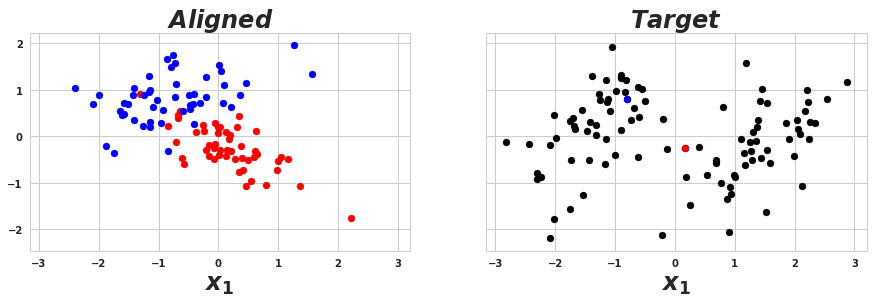

In [11]:
# Visualize data

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(15,4))

ax[0].scatter(XV[Y == 0, 0], XV[Y == 0, 1], c='r')
ax[0].scatter(XV[Y == 1, 0], XV[Y == 1, 1], c='b')
ax[0].set_xlabel('$x_1$', fontsize=fS)
ax[0].set_title('$Aligned$', fontsize=fS);

ax[1].scatter(ZC[:, 0], ZC[:, 1], c='k')
ax[1].scatter(ZC[u[0,0], 0], ZC[u[0,0], 1], c='r')
ax[1].scatter(ZC[u[1,0], 0], ZC[u[1,0], 1], c='b')
ax[1].set_xlabel('$x_1$', fontsize=fS)
ax[1].set_title('$Target$', fontsize=fS);

fig.savefig('viz/test_semisubalign01.png', bbox_inches='tight', padding=None)

## Test classification methods

In [12]:
# Train naive classifier
LR = LogisticRegressionCV(cv=5)
LR.fit(X, Y)

# Test naive classifier
print('Error of naive classifier = {}'.format(1 - LR.score(Z, U)))

Error of naive classifier = 0.62


In [13]:
# Train unsupervised subspace aligned classifier
USA = SubspaceAlignedClassifier()
USA.fit(X, Y, Z)

# Test adaptive classifier
print('Error of unsupervised Subspace Aligned classifier = {}'.format(USA.score(Z, U)))

Error of unsupervised Subspace Aligned classifier = 0.98


In [14]:
# Train semi-supervised subspace aligned classifier
SSA = SemiSubspaceAlignedClassifier()
SSA.fit(X, Y, Z, u)

# Test adaptive classifier
print('Error of semi-supervised Subspace Aligned classifier = {}'.format(SSA.score(Z, U)))

Error of semi-supervised Subspace Aligned classifier = 0.01
